# Naive Bayes Sentiment Analysis 

<div class="alert-success">
Nama :Arif Su'admaji
</div>

<div class="alert-danger">
Github : https://github.com/arifsuadmaji
</div>

<div class="alert-warning">
Pengantar Data Mining
</div>

<div class="alert-info">
2023
</div

# Import Library

In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import re

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split

#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#import stopword
from nltk.corpus import stopwords

# model 
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Load Datset

In [2]:
df = pd.read_csv("data_minyak_goreng.csv", usecols=['Tweet_id', 'Text', 'Label'])
df.head()

,Tweet_id,Text,Label
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0


In [3]:
df.shape

(101, 3)

In [4]:
df.isnull().sum()

Tweet_id    0
Text        0
Label       0
dtype: int64

In [5]:
df.Label.value_counts()

 0    89
 1     9
-1     3
Name: Label, dtype: int64

# NLP (Natural Language Processing)

### Remove user name

In [6]:
def remove_pattern(tweet, pattern):
    r = re.findall(pattern, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet
df['remove_user'] = np.vectorize(remove_pattern)(df['Text'], "@[\w]*")
df

,Tweet_id,Text,Label,remove_user
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1,Wah lumayan bisa di goreng mampu beli minyak ...
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0,Medianya bagus ya... Seakan2...perang di hent...
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0,"Di Indonesia Minyak Goreng Mahal, \nInggris &a..."
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1,Terus saya harus bilang wow gitu? Harga miny...
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0,Dodol......\nKalo sudah bener nggak mungkin ...
...,...,...,...,...
96,1541961133992869888,"@republikaonline Di Indonesia ini, seperti hal...",0,"Di Indonesia ini, seperti halnya minyak goren..."
97,1541959430690177024,Di tebang saja karna sudah tidak laku lagi bua...,0,Di tebang saja karna sudah tidak laku lagi bua...
98,1541947949844168704,minyak goreng mahal bngt ya 🙂,0,minyak goreng mahal bngt ya 🙂
99,1541936063853170689,@izalrafif @BRafizqy @ukhtielya @UmarChelseaa_...,0,"Sok2an peduli tetangga, 🤣🤣\n\nSaya hidup ..."


### Remove Tabulation

In [7]:
def remove_tabs(df, label):
    df[label] = df[label].apply(lambda x: x.replace("\n", " "))
    df[label] = df[label].apply(lambda x: x.replace("\r", " "))
    df[label] = df[label].apply(lambda x: x.replace("\t", " "))
    return df
#
df = remove_tabs(df, "remove_user")
df

,Tweet_id,Text,Label,remove_user
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1,Wah lumayan bisa di goreng mampu beli minyak ...
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0,Medianya bagus ya... Seakan2...perang di hent...
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0,"Di Indonesia Minyak Goreng Mahal, Inggris &am..."
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1,Terus saya harus bilang wow gitu? Harga miny...
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0,Dodol...... Kalo sudah bener nggak mungkin n...
...,...,...,...,...
96,1541961133992869888,"@republikaonline Di Indonesia ini, seperti hal...",0,"Di Indonesia ini, seperti halnya minyak goren..."
97,1541959430690177024,Di tebang saja karna sudah tidak laku lagi bua...,0,Di tebang saja karna sudah tidak laku lagi bua...
98,1541947949844168704,minyak goreng mahal bngt ya 🙂,0,minyak goreng mahal bngt ya 🙂
99,1541936063853170689,@izalrafif @BRafizqy @ukhtielya @UmarChelseaa_...,0,"Sok2an peduli tetangga, 🤣🤣 Saya hidup di..."


### Remove Punctuation

In [8]:
def remove_punctuation(series):
    text = "".join([word for word in series if word not in string.punctuation])
    return text
df['remove_punc'] = df['remove_user'].apply(remove_punctuation)
df

,Tweet_id,Text,Label,remove_user,remove_punc
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak ...
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0,Medianya bagus ya... Seakan2...perang di hent...,Medianya bagus ya Seakan2perang di hentikan s...
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0,"Di Indonesia Minyak Goreng Mahal, Inggris &am...",Di Indonesia Minyak Goreng Mahal Inggris amp ...
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1,Terus saya harus bilang wow gitu? Harga miny...,Terus saya harus bilang wow gitu Harga minya...
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0,Dodol...... Kalo sudah bener nggak mungkin n...,Dodol Kalo sudah bener nggak mungkin naikin ...
...,...,...,...,...,...
96,1541961133992869888,"@republikaonline Di Indonesia ini, seperti hal...",0,"Di Indonesia ini, seperti halnya minyak goren...",Di Indonesia ini seperti halnya minyak goreng...
97,1541959430690177024,Di tebang saja karna sudah tidak laku lagi bua...,0,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...
98,1541947949844168704,minyak goreng mahal bngt ya 🙂,0,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya 🙂
99,1541936063853170689,@izalrafif @BRafizqy @ukhtielya @UmarChelseaa_...,0,"Sok2an peduli tetangga, 🤣🤣 Saya hidup di...",Sok2an peduli tetangga 🤣🤣 Saya hidup dik...


### Remove emoji

In [9]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['remove_emoji'] = df['remove_punc'].apply(lambda x : remove_emoji(x))
df

,Tweet_id,Text,Label,remove_user,remove_punc,remove_emoji
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak ...
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0,Medianya bagus ya... Seakan2...perang di hent...,Medianya bagus ya Seakan2perang di hentikan s...,Medianya bagus ya Seakan2perang di hentikan s...
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0,"Di Indonesia Minyak Goreng Mahal, Inggris &am...",Di Indonesia Minyak Goreng Mahal Inggris amp ...,Di Indonesia Minyak Goreng Mahal Inggris amp ...
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1,Terus saya harus bilang wow gitu? Harga miny...,Terus saya harus bilang wow gitu Harga minya...,Terus saya harus bilang wow gitu Harga minya...
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0,Dodol...... Kalo sudah bener nggak mungkin n...,Dodol Kalo sudah bener nggak mungkin naikin ...,Dodol Kalo sudah bener nggak mungkin naikin ...
...,...,...,...,...,...,...
96,1541961133992869888,"@republikaonline Di Indonesia ini, seperti hal...",0,"Di Indonesia ini, seperti halnya minyak goren...",Di Indonesia ini seperti halnya minyak goreng...,Di Indonesia ini seperti halnya minyak goreng...
97,1541959430690177024,Di tebang saja karna sudah tidak laku lagi bua...,0,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...
98,1541947949844168704,minyak goreng mahal bngt ya 🙂,0,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya
99,1541936063853170689,@izalrafif @BRafizqy @ukhtielya @UmarChelseaa_...,0,"Sok2an peduli tetangga, 🤣🤣 Saya hidup di...",Sok2an peduli tetangga 🤣🤣 Saya hidup dik...,Sok2an peduli tetangga 🤣🤣 Saya hidup dik...


### more

In [10]:
# Clean text

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# Apply functions on OriginalTweet
df['remove_emoji'] = df['remove_emoji'].apply(lambda x : remove_url(x))
df['remove_emoji'] = df['remove_emoji'].apply(lambda x : seperate_alphanumeric(x))
df['remove_emoji'] = df['remove_emoji'].apply(lambda x : unique_char(cont_rep_char,x))
df['remove_emoji'] = df['remove_emoji'].apply(lambda x : char(x))
df

,Tweet_id,Text,Label,remove_user,remove_punc,remove_emoji
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak y...
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0,Medianya bagus ya... Seakan2...perang di hent...,Medianya bagus ya Seakan2perang di hentikan s...,Medianya bagus ya Seakan perang di hentikan ...
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0,"Di Indonesia Minyak Goreng Mahal, Inggris &am...",Di Indonesia Minyak Goreng Mahal Inggris amp ...,Di Indonesia Minyak Goreng Mahal Inggris amp E...
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1,Terus saya harus bilang wow gitu? Harga miny...,Terus saya harus bilang wow gitu Harga minya...,Terus saya harus bilang wow gitu Harga minyak ...
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0,Dodol...... Kalo sudah bener nggak mungkin n...,Dodol Kalo sudah bener nggak mungkin naikin ...,Dodol Kalo sudah bener nggak mungkin naikin BB...
...,...,...,...,...,...,...
96,1541961133992869888,"@republikaonline Di Indonesia ini, seperti hal...",0,"Di Indonesia ini, seperti halnya minyak goren...",Di Indonesia ini seperti halnya minyak goreng...,Di Indonesia ini seperti halnya minyak goreng ...
97,1541959430690177024,Di tebang saja karna sudah tidak laku lagi bua...,0,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...
98,1541947949844168704,minyak goreng mahal bngt ya 🙂,0,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya
99,1541936063853170689,@izalrafif @BRafizqy @ukhtielya @UmarChelseaa_...,0,"Sok2an peduli tetangga, 🤣🤣 Saya hidup di...",Sok2an peduli tetangga 🤣🤣 Saya hidup dik...,Sok an peduli tetangga Saya hidup dikampung ...


### Case Folding

In [11]:
df['case_folding'] = df['remove_emoji'].apply(lambda x : x.lower())
df

,Tweet_id,Text,Label,remove_user,remove_punc,remove_emoji,case_folding
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak y...,wah lumayan bisa di goreng mampu beli minyak y...
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0,Medianya bagus ya... Seakan2...perang di hent...,Medianya bagus ya Seakan2perang di hentikan s...,Medianya bagus ya Seakan perang di hentikan ...,medianya bagus ya seakan perang di hentikan ...
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0,"Di Indonesia Minyak Goreng Mahal, Inggris &am...",Di Indonesia Minyak Goreng Mahal Inggris amp ...,Di Indonesia Minyak Goreng Mahal Inggris amp E...,di indonesia minyak goreng mahal inggris amp e...
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1,Terus saya harus bilang wow gitu? Harga miny...,Terus saya harus bilang wow gitu Harga minya...,Terus saya harus bilang wow gitu Harga minyak ...,terus saya harus bilang wow gitu harga minyak ...
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0,Dodol...... Kalo sudah bener nggak mungkin n...,Dodol Kalo sudah bener nggak mungkin naikin ...,Dodol Kalo sudah bener nggak mungkin naikin BB...,dodol kalo sudah bener nggak mungkin naikin bb...
...,...,...,...,...,...,...,...
96,1541961133992869888,"@republikaonline Di Indonesia ini, seperti hal...",0,"Di Indonesia ini, seperti halnya minyak goren...",Di Indonesia ini seperti halnya minyak goreng...,Di Indonesia ini seperti halnya minyak goreng ...,di indonesia ini seperti halnya minyak goreng ...
97,1541959430690177024,Di tebang saja karna sudah tidak laku lagi bua...,0,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,di tebang saja karna sudah tidak laku lagi bua...
98,1541947949844168704,minyak goreng mahal bngt ya 🙂,0,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya,minyak goreng mahal bngt ya
99,1541936063853170689,@izalrafif @BRafizqy @ukhtielya @UmarChelseaa_...,0,"Sok2an peduli tetangga, 🤣🤣 Saya hidup di...",Sok2an peduli tetangga 🤣🤣 Saya hidup dik...,Sok an peduli tetangga Saya hidup dikampung ...,sok an peduli tetangga saya hidup dikampung ...


### Remove Duplicate

In [12]:
df.drop_duplicates(subset='case_folding', keep = 'first', inplace=True)
df

,Tweet_id,Text,Label,remove_user,remove_punc,remove_emoji,case_folding
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak y...,wah lumayan bisa di goreng mampu beli minyak y...
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0,Medianya bagus ya... Seakan2...perang di hent...,Medianya bagus ya Seakan2perang di hentikan s...,Medianya bagus ya Seakan perang di hentikan ...,medianya bagus ya seakan perang di hentikan ...
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0,"Di Indonesia Minyak Goreng Mahal, Inggris &am...",Di Indonesia Minyak Goreng Mahal Inggris amp ...,Di Indonesia Minyak Goreng Mahal Inggris amp E...,di indonesia minyak goreng mahal inggris amp e...
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1,Terus saya harus bilang wow gitu? Harga miny...,Terus saya harus bilang wow gitu Harga minya...,Terus saya harus bilang wow gitu Harga minyak ...,terus saya harus bilang wow gitu harga minyak ...
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0,Dodol...... Kalo sudah bener nggak mungkin n...,Dodol Kalo sudah bener nggak mungkin naikin ...,Dodol Kalo sudah bener nggak mungkin naikin BB...,dodol kalo sudah bener nggak mungkin naikin bb...
...,...,...,...,...,...,...,...
96,1541961133992869888,"@republikaonline Di Indonesia ini, seperti hal...",0,"Di Indonesia ini, seperti halnya minyak goren...",Di Indonesia ini seperti halnya minyak goreng...,Di Indonesia ini seperti halnya minyak goreng ...,di indonesia ini seperti halnya minyak goreng ...
97,1541959430690177024,Di tebang saja karna sudah tidak laku lagi bua...,0,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,di tebang saja karna sudah tidak laku lagi bua...
98,1541947949844168704,minyak goreng mahal bngt ya 🙂,0,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya,minyak goreng mahal bngt ya
99,1541936063853170689,@izalrafif @BRafizqy @ukhtielya @UmarChelseaa_...,0,"Sok2an peduli tetangga, 🤣🤣 Saya hidup di...",Sok2an peduli tetangga 🤣🤣 Saya hidup dik...,Sok an peduli tetangga Saya hidup dikampung ...,sok an peduli tetangga saya hidup dikampung ...


### Remove Stopwords

In [13]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [14]:
stopwords_indonesia = stopwords.words('indonesian')
 
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    #remove coma
    tweet = re.sub(r',','',tweet)
    
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean
df['tweet_clean'] = df['case_folding'].apply(lambda x: clean_tweets(x))
df

,Tweet_id,Text,Label,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak y...,wah lumayan bisa di goreng mampu beli minyak y...,"[lumayan, goreng, beli, minyak, mahal, hahaha]"
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0,Medianya bagus ya... Seakan2...perang di hent...,Medianya bagus ya Seakan2perang di hentikan s...,Medianya bagus ya Seakan perang di hentikan ...,medianya bagus ya seakan perang di hentikan ...,"[media, bagus, ya, akan, perang, henti, hadir,..."
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0,"Di Indonesia Minyak Goreng Mahal, Inggris &am...",Di Indonesia Minyak Goreng Mahal Inggris amp ...,Di Indonesia Minyak Goreng Mahal Inggris amp E...,di indonesia minyak goreng mahal inggris amp e...,"[indonesia, minyak, goreng, mahal, inggris, am..."
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1,Terus saya harus bilang wow gitu? Harga miny...,Terus saya harus bilang wow gitu Harga minya...,Terus saya harus bilang wow gitu Harga minyak ...,terus saya harus bilang wow gitu harga minyak ...,"[bilang, wow, gitu, harga, minyak, goreng, mah..."
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0,Dodol...... Kalo sudah bener nggak mungkin n...,Dodol Kalo sudah bener nggak mungkin naikin ...,Dodol Kalo sudah bener nggak mungkin naikin BB...,dodol kalo sudah bener nggak mungkin naikin bb...,"[dodol, kalo, bener, nggak, naikin, bbm, ngaak..."
...,...,...,...,...,...,...,...,...
96,1541961133992869888,"@republikaonline Di Indonesia ini, seperti hal...",0,"Di Indonesia ini, seperti halnya minyak goren...",Di Indonesia ini seperti halnya minyak goreng...,Di Indonesia ini seperti halnya minyak goreng ...,di indonesia ini seperti halnya minyak goreng ...,"[indonesia, hal, minyak, goreng, bbm, gak, mah..."
97,1541959430690177024,Di tebang saja karna sudah tidak laku lagi bua...,0,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,di tebang saja karna sudah tidak laku lagi bua...,"[tebang, karna, laku, buah, nya, sembako, bbm,..."
98,1541947949844168704,minyak goreng mahal bngt ya 🙂,0,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya,minyak goreng mahal bngt ya,"[minyak, goreng, mahal, bngt, ya]"
99,1541936063853170689,@izalrafif @BRafizqy @ukhtielya @UmarChelseaa_...,0,"Sok2an peduli tetangga, 🤣🤣 Saya hidup di...",Sok2an peduli tetangga 🤣🤣 Saya hidup dik...,Sok an peduli tetangga Saya hidup dikampung ...,sok an peduli tetangga saya hidup dikampung ...,"[sok, an, peduli, tetangga, hidup, kampung, gk..."


In [15]:
#remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
df['Tweet'] = df['tweet_clean'].apply(lambda x: remove_punct(x))
df

,Tweet_id,Text,Label,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean,Tweet
0,1542657462561406976,@corbuzier Wah lumayan bisa di goreng mampu be...,1,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak ...,Wah lumayan bisa di goreng mampu beli minyak y...,wah lumayan bisa di goreng mampu beli minyak y...,"[lumayan, goreng, beli, minyak, mahal, hahaha]",lumayan goreng beli minyak mahal hahaha
1,1542621717981298688,@geloraco Medianya bagus ya... Seakan2...peran...,0,Medianya bagus ya... Seakan2...perang di hent...,Medianya bagus ya Seakan2perang di hentikan s...,Medianya bagus ya Seakan perang di hentikan ...,medianya bagus ya seakan perang di hentikan ...,"[media, bagus, ya, akan, perang, henti, hadir,...",media bagus ya akan perang henti hadir preside...
2,1542618539839741952,"Di Indonesia Minyak Goreng Mahal, \nInggris &a...",0,"Di Indonesia Minyak Goreng Mahal, Inggris &am...",Di Indonesia Minyak Goreng Mahal Inggris amp ...,Di Indonesia Minyak Goreng Mahal Inggris amp E...,di indonesia minyak goreng mahal inggris amp e...,"[indonesia, minyak, goreng, mahal, inggris, am...",indonesia minyak goreng mahal inggris amp erop...
3,1542612867366547456,@jokowi @BiLLYKHAERUDIN Terus saya harus bilan...,1,Terus saya harus bilang wow gitu? Harga miny...,Terus saya harus bilang wow gitu Harga minya...,Terus saya harus bilang wow gitu Harga minyak ...,terus saya harus bilang wow gitu harga minyak ...,"[bilang, wow, gitu, harga, minyak, goreng, mah...",bilang wow gitu harga minyak goreng mahal pakde
4,1542593320089980928,@Dennysiregar7 @jokowi Dodol......\nKalo sudah...,0,Dodol...... Kalo sudah bener nggak mungkin n...,Dodol Kalo sudah bener nggak mungkin naikin ...,Dodol Kalo sudah bener nggak mungkin naikin BB...,dodol kalo sudah bener nggak mungkin naikin bb...,"[dodol, kalo, bener, nggak, naikin, bbm, ngaak...",dodol kalo bener nggak naikin bbm ngaak minyak...
...,...,...,...,...,...,...,...,...,...
96,1541961133992869888,"@republikaonline Di Indonesia ini, seperti hal...",0,"Di Indonesia ini, seperti halnya minyak goren...",Di Indonesia ini seperti halnya minyak goreng...,Di Indonesia ini seperti halnya minyak goreng ...,di indonesia ini seperti halnya minyak goreng ...,"[indonesia, hal, minyak, goreng, bbm, gak, mah...",indonesia hal minyak goreng bbm gak mahal krn ...
97,1541959430690177024,Di tebang saja karna sudah tidak laku lagi bua...,0,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,Di tebang saja karna sudah tidak laku lagi bua...,di tebang saja karna sudah tidak laku lagi bua...,"[tebang, karna, laku, buah, nya, sembako, bbm,...",tebang karna laku buah nya sembako bbm pupuk m...
98,1541947949844168704,minyak goreng mahal bngt ya 🙂,0,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya 🙂,minyak goreng mahal bngt ya,minyak goreng mahal bngt ya,"[minyak, goreng, mahal, bngt, ya]",minyak goreng mahal bngt ya
99,1541936063853170689,@izalrafif @BRafizqy @ukhtielya @UmarChelseaa_...,0,"Sok2an peduli tetangga, 🤣🤣 Saya hidup di...",Sok2an peduli tetangga 🤣🤣 Saya hidup dik...,Sok an peduli tetangga Saya hidup dikampung ...,sok an peduli tetangga saya hidup dikampung ...,"[sok, an, peduli, tetangga, hidup, kampung, gk...",sok an peduli tetangga hidup kampung gk yg ter...


In [16]:
df.sort_values("Tweet", inplace = True)
df

,Tweet_id,Text,Label,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean,Tweet
90,1542008275738058754,Also piinis kek apaan beli minyak goreng pake ...,0,Also piinis kek apaan beli minyak goreng pake ...,Also piinis kek apaan beli minyak goreng pake ...,Also piinis kek apaan beli minyak goreng pake ...,also piinis kek apaan beli minyak goreng pake ...,"[also, piinis, kek, beli, minyak, goreng, pake...",also piinis kek beli minyak goreng pake aplika...
30,1542419456772608000,@MuksonSimangun4 @RamliRizal Apanya kau cebong...,0,"Apanya kau cebong, ini gak warga negara, sem...",Apanya kau cebong ini gak warga negara semua...,Apanya kau cebong ini gak warga negara semua a...,apanya kau cebong ini gak warga negara semua a...,"[apa, kau, cebong, gak, warga, negara, aja, gk...",apa kau cebong gak warga negara aja gk becus p...
91,1542002244752908288,@miwo0o_ @FOOD_FESS Bukan hanya ayam yang maha...,0,"Bukan hanya ayam yang mahal, bumbu2nya mahal...",Bukan hanya ayam yang mahal bumbu2nya mahal ...,Bukan hanya ayam yang mahal bumbu nya mahal ...,bukan hanya ayam yang mahal bumbu nya mahal ...,"[ayam, mahal, bumbu, nya, mahal, cabe, ratus, ...",ayam mahal bumbu nya mahal cabe ratus ribu baw...
77,1542116419877347331,Memang pembelian minyak goreng ini harus dibat...,0,Memang pembelian minyak goreng ini harus dibat...,Memang pembelian minyak goreng ini harus dibat...,Memang pembelian minyak goreng ini harus dibat...,memang pembelian minyak goreng ini harus dibat...,"[beli, minyak, goreng, batas, harga, mahal, pa...",beli minyak goreng batas harga mahal pasar dun...
100,1541933778905354240,@Dennysiregar7 Pak biden tertawa karena kagum ...,0,Pak biden tertawa karena kagum dengan Indones...,Pak biden tertawa karena kagum dengan Indones...,Pak biden tertawa karena kagum dengan Indonesi...,pak biden tertawa karena kagum dengan indonesi...,"[biden, tertawa, kagum, indonesia, jokowi, cer...",biden tertawa kagum indonesia jokowi cerita ka...
...,...,...,...,...,...,...,...,...,...
92,1541996657910632448,Xleh goreng sbb minyak mahal,0,Xleh goreng sbb minyak mahal,Xleh goreng sbb minyak mahal,Xleh goreng sbb minyak mahal,xleh goreng sbb minyak mahal,"[xleh, goreng, sbb, minyak, mahal]",xleh goreng sbb minyak mahal
39,1542363881057976321,@detikcom Ya terus knp harga minyak goreng mas...,0,Ya terus knp harga minyak goreng masih tetep ...,Ya terus knp harga minyak goreng masih tetep ...,Ya terus knp harga minyak goreng masih tetep m...,ya terus knp harga minyak goreng masih tetep m...,"[ya, knp, harga, minyak, goreng, tetep, mahall...",ya knp harga minyak goreng tetep mahallogikany...
68,1542132037905043456,"Yuk kita awasi bersama, jangan sampai ada oknu...",0,"Yuk kita awasi bersama, jangan sampai ada oknu...",Yuk kita awasi bersama jangan sampai ada oknum...,Yuk kita awasi bersama jangan sampai ada oknum...,yuk kita awasi bersama jangan sampai ada oknum...,"[yuk, awas, oknumoknum, ambil, sempat, sempit,...",yuk awas oknumoknum ambil sempat sempit timbun...
42,1542340386378551296,Zulhas: Saya Sudah Tahu Kenapa Minyak Goreng M...,1,Zulhas: Saya Sudah Tahu Kenapa Minyak Goreng M...,Zulhas Saya Sudah Tahu Kenapa Minyak Goreng Ma...,Zulhas Saya Sudah Tahu Kenapa Minyak Goreng Ma...,zulhas saya sudah tahu kenapa minyak goreng ma...,"[zulhas, minyak, goreng, mahal, bulan, beres, ...",zulhas minyak goreng mahal bulan beres httpstc...


In [17]:
df.drop_duplicates(subset ="Tweet", keep = 'first', inplace = True)
df

,Tweet_id,Text,Label,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean,Tweet
90,1542008275738058754,Also piinis kek apaan beli minyak goreng pake ...,0,Also piinis kek apaan beli minyak goreng pake ...,Also piinis kek apaan beli minyak goreng pake ...,Also piinis kek apaan beli minyak goreng pake ...,also piinis kek apaan beli minyak goreng pake ...,"[also, piinis, kek, beli, minyak, goreng, pake...",also piinis kek beli minyak goreng pake aplika...
30,1542419456772608000,@MuksonSimangun4 @RamliRizal Apanya kau cebong...,0,"Apanya kau cebong, ini gak warga negara, sem...",Apanya kau cebong ini gak warga negara semua...,Apanya kau cebong ini gak warga negara semua a...,apanya kau cebong ini gak warga negara semua a...,"[apa, kau, cebong, gak, warga, negara, aja, gk...",apa kau cebong gak warga negara aja gk becus p...
91,1542002244752908288,@miwo0o_ @FOOD_FESS Bukan hanya ayam yang maha...,0,"Bukan hanya ayam yang mahal, bumbu2nya mahal...",Bukan hanya ayam yang mahal bumbu2nya mahal ...,Bukan hanya ayam yang mahal bumbu nya mahal ...,bukan hanya ayam yang mahal bumbu nya mahal ...,"[ayam, mahal, bumbu, nya, mahal, cabe, ratus, ...",ayam mahal bumbu nya mahal cabe ratus ribu baw...
77,1542116419877347331,Memang pembelian minyak goreng ini harus dibat...,0,Memang pembelian minyak goreng ini harus dibat...,Memang pembelian minyak goreng ini harus dibat...,Memang pembelian minyak goreng ini harus dibat...,memang pembelian minyak goreng ini harus dibat...,"[beli, minyak, goreng, batas, harga, mahal, pa...",beli minyak goreng batas harga mahal pasar dun...
100,1541933778905354240,@Dennysiregar7 Pak biden tertawa karena kagum ...,0,Pak biden tertawa karena kagum dengan Indones...,Pak biden tertawa karena kagum dengan Indones...,Pak biden tertawa karena kagum dengan Indonesi...,pak biden tertawa karena kagum dengan indonesi...,"[biden, tertawa, kagum, indonesia, jokowi, cer...",biden tertawa kagum indonesia jokowi cerita ka...
...,...,...,...,...,...,...,...,...,...
92,1541996657910632448,Xleh goreng sbb minyak mahal,0,Xleh goreng sbb minyak mahal,Xleh goreng sbb minyak mahal,Xleh goreng sbb minyak mahal,xleh goreng sbb minyak mahal,"[xleh, goreng, sbb, minyak, mahal]",xleh goreng sbb minyak mahal
39,1542363881057976321,@detikcom Ya terus knp harga minyak goreng mas...,0,Ya terus knp harga minyak goreng masih tetep ...,Ya terus knp harga minyak goreng masih tetep ...,Ya terus knp harga minyak goreng masih tetep m...,ya terus knp harga minyak goreng masih tetep m...,"[ya, knp, harga, minyak, goreng, tetep, mahall...",ya knp harga minyak goreng tetep mahallogikany...
68,1542132037905043456,"Yuk kita awasi bersama, jangan sampai ada oknu...",0,"Yuk kita awasi bersama, jangan sampai ada oknu...",Yuk kita awasi bersama jangan sampai ada oknum...,Yuk kita awasi bersama jangan sampai ada oknum...,yuk kita awasi bersama jangan sampai ada oknum...,"[yuk, awas, oknumoknum, ambil, sempat, sempit,...",yuk awas oknumoknum ambil sempat sempit timbun...
42,1542340386378551296,Zulhas: Saya Sudah Tahu Kenapa Minyak Goreng M...,1,Zulhas: Saya Sudah Tahu Kenapa Minyak Goreng M...,Zulhas Saya Sudah Tahu Kenapa Minyak Goreng Ma...,Zulhas Saya Sudah Tahu Kenapa Minyak Goreng Ma...,zulhas saya sudah tahu kenapa minyak goreng ma...,"[zulhas, minyak, goreng, mahal, bulan, beres, ...",zulhas minyak goreng mahal bulan beres httpstc...


In [18]:
df.to_csv('output.csv',encoding='utf8', index=False)
df

,Tweet_id,Text,Label,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean,Tweet
90,1542008275738058754,Also piinis kek apaan beli minyak goreng pake ...,0,Also piinis kek apaan beli minyak goreng pake ...,Also piinis kek apaan beli minyak goreng pake ...,Also piinis kek apaan beli minyak goreng pake ...,also piinis kek apaan beli minyak goreng pake ...,"[also, piinis, kek, beli, minyak, goreng, pake...",also piinis kek beli minyak goreng pake aplika...
30,1542419456772608000,@MuksonSimangun4 @RamliRizal Apanya kau cebong...,0,"Apanya kau cebong, ini gak warga negara, sem...",Apanya kau cebong ini gak warga negara semua...,Apanya kau cebong ini gak warga negara semua a...,apanya kau cebong ini gak warga negara semua a...,"[apa, kau, cebong, gak, warga, negara, aja, gk...",apa kau cebong gak warga negara aja gk becus p...
91,1542002244752908288,@miwo0o_ @FOOD_FESS Bukan hanya ayam yang maha...,0,"Bukan hanya ayam yang mahal, bumbu2nya mahal...",Bukan hanya ayam yang mahal bumbu2nya mahal ...,Bukan hanya ayam yang mahal bumbu nya mahal ...,bukan hanya ayam yang mahal bumbu nya mahal ...,"[ayam, mahal, bumbu, nya, mahal, cabe, ratus, ...",ayam mahal bumbu nya mahal cabe ratus ribu baw...
77,1542116419877347331,Memang pembelian minyak goreng ini harus dibat...,0,Memang pembelian minyak goreng ini harus dibat...,Memang pembelian minyak goreng ini harus dibat...,Memang pembelian minyak goreng ini harus dibat...,memang pembelian minyak goreng ini harus dibat...,"[beli, minyak, goreng, batas, harga, mahal, pa...",beli minyak goreng batas harga mahal pasar dun...
100,1541933778905354240,@Dennysiregar7 Pak biden tertawa karena kagum ...,0,Pak biden tertawa karena kagum dengan Indones...,Pak biden tertawa karena kagum dengan Indones...,Pak biden tertawa karena kagum dengan Indonesi...,pak biden tertawa karena kagum dengan indonesi...,"[biden, tertawa, kagum, indonesia, jokowi, cer...",biden tertawa kagum indonesia jokowi cerita ka...
...,...,...,...,...,...,...,...,...,...
92,1541996657910632448,Xleh goreng sbb minyak mahal,0,Xleh goreng sbb minyak mahal,Xleh goreng sbb minyak mahal,Xleh goreng sbb minyak mahal,xleh goreng sbb minyak mahal,"[xleh, goreng, sbb, minyak, mahal]",xleh goreng sbb minyak mahal
39,1542363881057976321,@detikcom Ya terus knp harga minyak goreng mas...,0,Ya terus knp harga minyak goreng masih tetep ...,Ya terus knp harga minyak goreng masih tetep ...,Ya terus knp harga minyak goreng masih tetep m...,ya terus knp harga minyak goreng masih tetep m...,"[ya, knp, harga, minyak, goreng, tetep, mahall...",ya knp harga minyak goreng tetep mahallogikany...
68,1542132037905043456,"Yuk kita awasi bersama, jangan sampai ada oknu...",0,"Yuk kita awasi bersama, jangan sampai ada oknu...",Yuk kita awasi bersama jangan sampai ada oknum...,Yuk kita awasi bersama jangan sampai ada oknum...,yuk kita awasi bersama jangan sampai ada oknum...,"[yuk, awas, oknumoknum, ambil, sempat, sempit,...",yuk awas oknumoknum ambil sempat sempit timbun...
42,1542340386378551296,Zulhas: Saya Sudah Tahu Kenapa Minyak Goreng M...,1,Zulhas: Saya Sudah Tahu Kenapa Minyak Goreng M...,Zulhas Saya Sudah Tahu Kenapa Minyak Goreng Ma...,Zulhas Saya Sudah Tahu Kenapa Minyak Goreng Ma...,zulhas saya sudah tahu kenapa minyak goreng ma...,"[zulhas, minyak, goreng, mahal, bulan, beres, ...",zulhas minyak goreng mahal bulan beres httpstc...


# Train Test Split 

In [19]:
BOW = CountVectorizer()
X = df['Tweet'].copy()
X_Bow = BOW.fit_transform(X)

y = df['Label']

X_train_Bow, X_test_Bow, y_train_Bow, y_test_Bow = train_test_split(X_Bow, y, test_size=0.2, random_state=42)
X_train_Bow.shape, X_test_Bow.shape, y_train_Bow.shape, y_test_Bow.shape

((80, 774), (21, 774), (80,), (21,))

In [20]:
TFIDF = TfidfVectorizer()
X_TFIDF = TFIDF.fit_transform(X)

y = df['Label']

X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X_TFIDF, y, test_size=0.2, random_state=42)
X_train_TFIDF.shape, X_test_TFIDF.shape, y_train_TFIDF.shape, y_test_TFIDF.shape

((80, 774), (21, 774), (80,), (21,))

# Model

In [21]:
NB_Bow = MultinomialNB()
NB_Bow.fit(X_train_Bow, y_train_Bow)

MultinomialNB()

In [22]:
y_pred_Bow = NB_Bow.predict(X_test_Bow)
y_pred_Bow

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [23]:
y_test_Bow

99     0
21     0
53     0
93     0
31     0
47     0
28     1
38     0
66     0
90     0
70     0
54     0
39     0
27     0
22     0
100    0
88     0
6      0
4      0
96     0
72     0
Name: Label, dtype: int64

In [24]:
NB_TFIDF = MultinomialNB()
NB_TFIDF.fit(X_train_TFIDF, y_train_TFIDF)

MultinomialNB()

In [25]:
y_pred_TFIDF = NB_TFIDF.predict(X_test_TFIDF)
y_pred_TFIDF

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [26]:
y_test_TFIDF

99     0
21     0
53     0
93     0
31     0
47     0
28     1
38     0
66     0
90     0
70     0
54     0
39     0
27     0
22     0
100    0
88     0
6      0
4      0
96     0
72     0
Name: Label, dtype: int64

# Evaluate Model

In [27]:
print('accuracy',accuracy_score(y_test_Bow, y_pred_Bow))

accuracy 0.8095238095238095


In [28]:
print(classification_report(y_test_Bow, y_pred_Bow))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.47      0.42      0.45        21
weighted avg       0.90      0.81      0.85        21



In [29]:
cm = confusion_matrix(y_test_Bow, y_pred_Bow)
cm

array([[17,  3],
       [ 1,  0]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

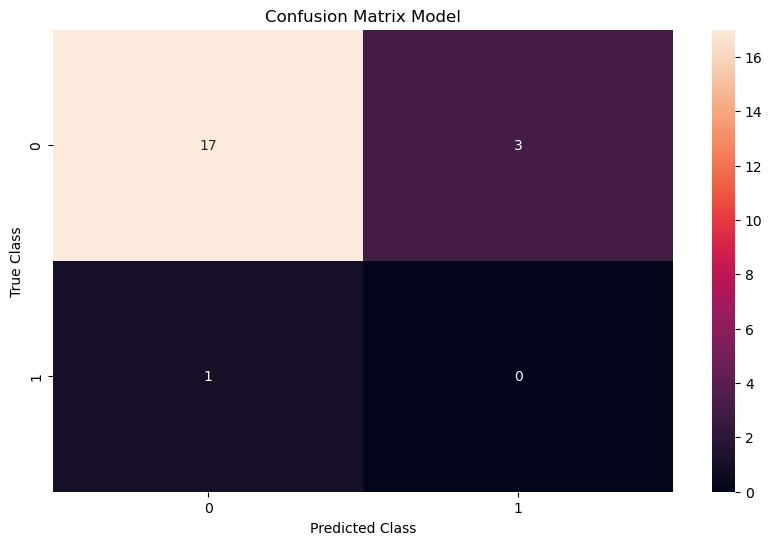

In [30]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d")

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

In [31]:
print('accuracy',accuracy_score(y_test_TFIDF, y_pred_TFIDF))

accuracy 0.9523809523809523


In [32]:
print(classification_report(y_test_TFIDF, y_pred_TFIDF))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.48      0.50      0.49        21
weighted avg       0.91      0.95      0.93        21



C:\Users\arifs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arifs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arifs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
cm = confusion_matrix(y_test_TFIDF, y_pred_TFIDF)
cm

array([[20,  0],
       [ 1,  0]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

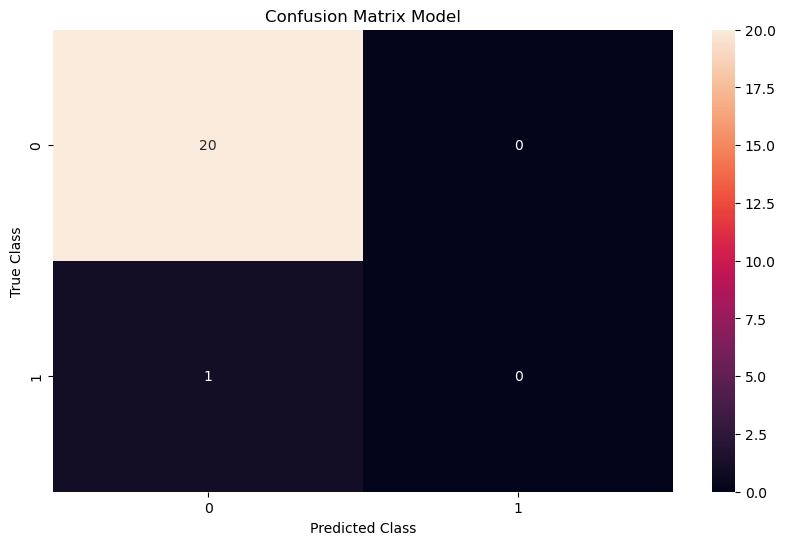

In [34]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d")

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")